In [29]:
import pandas as pd

# Load the first dataset from a CSV file
df1 = pd.read_csv('C:/Users/27728/OneDrive/Documents/archive/ds_salaries.csv')


# Display the first few rows of the dataframe
print(df1.head())

# Display information about the dataset (columns, data types, and non-null counts)
print(df1.info())

# Display summary statistics for numerical columns
print(df1.describe())


# Check for missing values in the dataset
print(df1.isnull().sum())


# Forward fill missing values in the dataset
df1.ffill(inplace=True)



# Convert 'employment_type' column to a categorical data type
df1['employment_type'] = df1['employment_type'].astype('category')


# Remove duplicate rows from the dataframe
df1.drop_duplicates(inplace=True)





   work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES            L  
1               US

In [81]:
import pandas as pd

# Load the second dataset from a CSV file
df2 = pd.read_csv('C:/Users/27728/OneDrive/Documents/archive/bank_loan.csv')


# Explore the first dataset by displaying the first five rows
print(df2.head())

# Display information about the dataset (columns, data types, and non-null counts)
print(df2.info())

# Display summary statistics for numerical columns
print(df2.describe())


# Check for missing values in the second dataset
missingValue=df2.isnull().sum()
print(missingValue)


# Forward fill missing values in the dataset
df2.ffill(inplace=True)

# Convert 'Family' column to a categorical data type
df2['Family'] = df2['Family'].astype('category')



# Remove duplicate rows from the dataframe
df2.drop_duplicates(inplace=True)


# Create an 'age_group' column by binning the 'Age' column into intervals
df2['age_group'] = pd.cut(df2['Age'], bins=[0, 25, 35, 45, 55, 65], labels=['18-25', '26-35', '36-45', '46-55', '56-65'])

# Define features for the model
features = df2[['Age', 'Experience', 'Income', 'Family', 'CCAvg']]



# Create a target variable based on income threshold
target = (df2['Income'] < 50).astype(int)  # Example: Withdraw if income < 50

# Create a 'High_Income' column based on whether income is above the median
df2['High_Income'] = (df2['Income'] > df2['Income'].median()).astype(int)







   ID  Age  Experience  Income  ZIP Code  Family CCAvg  Education  Mortgage  \
0   1   25           1      49     91108       4  1/60          1         0   
1   2   45          19      34     90089       3  1/50          1         0   
2   3   39          15      11     94720       1  1/00          1         0   
3   4   35           9     100     94112       1  2/70          2         0   
4   5   35           8      45     91330       4  1/00          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 co

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Reload the bank loan dataset for training/testing

df2 = pd.read_csv('C:/Users/27728/OneDrive/Documents/archive/bank_loan.csv')



# Select features (X) and target (y)
X =df2[['Age', 'Income', 'Experience', 'Family']]  
y = df2['Personal Loan'] 




# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train a RandomForestClassifier on the training set
model = RandomForestClassifier()

# Predict the target on the testing set
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Print classification report to evaluate the model
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.95      0.99      0.97       895
           1       0.91      0.60      0.72       105

    accuracy                           0.95      1000
   macro avg       0.93      0.80      0.85      1000
weighted avg       0.95      0.95      0.95      1000



In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
df2 = pd.read_csv('C:/Users/27728/OneDrive/Documents/archive/bank_loan.csv')

model = RandomForestClassifier()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 


[[889   6]
 [ 37  68]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       895
           1       0.92      0.65      0.76       105

    accuracy                           0.96      1000
   macro avg       0.94      0.82      0.87      1000
weighted avg       0.96      0.96      0.95      1000



In [86]:
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(df1['salary_in_usd'], order=(5, 1, 0)) 
model_fit = model.fit()



forecast = model_fit.forecast(steps=12)


print(model_fit.summary())

C:\Users\27728\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\27728\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\27728\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          salary_in_usd   No. Observations:                 2584
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -32428.777
Date:                Thu, 17 Oct 2024   AIC                          64869.554
Time:                        13:16:07   BIC                          64904.694
Sample:                             0   HQIC                         64882.290
                               - 2584                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7234      0.019    -38.159      0.000      -0.761      -0.686
ar.L2         -0.5114      0.021    -23.909      0.000      -0.553      -0.470
ar.L3         -0.4284      0.024    -17.823      0.0

C:\Users\27728\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\27728\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [67]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


feedback_data = ['I love the new system!', 'The system is confusing', 'I feel secure about my savings.']


vectorizer = CountVectorizer()
X_feedback = vectorizer.fit_transform(feedback_data)


model = MultinomialNB()
model.fit(X_feedback, [1, 0, 1])  


MultinomialNB()

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


X = df2[['Age', 'Income', 'Experience']]  # Add relevant features
y = df2['Experience']  # Target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = RandomForestClassifier()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          -3       0.00      0.00      0.00         1
          -2       1.00      0.83      0.91         6
          -1       0.73      1.00      0.84         8
           0       1.00      0.94      0.97        17
           1       1.00      0.95      0.98        21
           2       0.94      1.00      0.97        17
           3       1.00      1.00      1.00        40
           4       1.00      1.00      1.00        30
           5       1.00      0.98      0.99        42
           6       0.97      1.00      0.99        34
           7       1.00      1.00      1.00        34
           8       1.00      0.91      0.95        33
           9       1.00      0.98      0.99        45
          10       1.00      1.00      1.00        33
          11       1.00      0.97      0.99        35
          12       0.81      1.00      0.89        25
          13       1.00      0.97      0.99        34
          14       1.00    

C:\Users\27728\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\27728\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\27728\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [91]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd


X = df2[['Age', 'Income']]  
y = df2['Experience'] 


print("Class distribution:\n", y.value_counts())


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = RandomForestClassifier()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print(classification_report(y_test, y_pred, zero_division=0))


cv_scores = cross_val_score(model, X, y, cv=3)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean()}")


importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame(importances, index=feature_names, columns=['Importance']).sort_values('Importance', ascending=False)
print("Feature importances:\n", importance_df)


Class distribution:
 Experience
 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 16    127
 14    127
 30    126
 17    125
 34    125
 27    125
 22    124
 29    124
 7     121
 6     119
 15    119
 8     119
 10    118
 13    117
 33    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 2      85
 39     85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: count, dtype: int64
              precision    recall  f1-score   support

          -3       0.00      0.00      0.00         1
          -2       1.00      0.33      0.50         6
          -1       0.33      0.25      0.29         8
           0       0.38      0.35      0.36        17
           1       0.30      0.33      0.32        21
           2       0.24      0.29      0.26        17
           3       0.42      0.33      0.37   

In [95]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")


Best parameters: {'max_depth': 10, 'n_estimators': 200}


Sentiment Analysis of Employee Feedback
Introduction
Sentiment analysis is a subfield of Natural Language Processing (NLP) that focuses on identifying and categorizing the emotions expressed in text. In the context of employee feedback, sentiment analysis can help organizations understand how their workforce perceives specific systems or policies, such as the two-pot system. This understanding can inform decision-making and improve employee satisfaction.

Objectives
The primary objective of applying sentiment analysis to employee feedback is to categorize comments into three distinct sentiments:

Positive: Feedback that expresses satisfaction or approval.
Negative: Feedback that indicates dissatisfaction or disapproval.
Neutral: Feedback that neither expresses strong positive nor negative feelings.
Steps to Perform Sentiment Analysis
Data Collection

Gather employee feedback from surveys, reviews, or suggestion boxes. This data should be in text format, containing comments about the two-pot system.
Data Preprocessing

Text Cleaning: Remove any irrelevant characters, special symbols, and formatting issues to standardize the text. This may include:
Lowercasing the text
Removing punctuation and numbers
Eliminating stop words (common words that do not add significant meaning, e.g., "and", "the", "is")
Tokenization

Split the cleaned text into individual words or tokens. This helps in analyzing the text at a granular level.
Sentiment Analysis Techniques

Various techniques can be employed to determine the sentiment of the feedback:
Lexicon-Based Approaches: Utilize pre-defined lists of words associated with positive, negative, and neutral sentiments. The sentiment of a piece of text can be assessed based on the occurrences of these words.
Machine Learning Approaches:
Supervised Learning: Train a model using a labeled dataset (where feedback is pre-categorized as positive, negative, or neutral). Common algorithms include:
Naive Bayes
Support Vector Machines (SVM)
Random Forests
Unsupervised Learning: Use techniques like clustering to group similar feedback and analyze the overall sentiment of each cluster without labeled data.
Deep Learning Approaches: Implement more complex models, such as Recurrent Neural Networks (RNNs) or Transformers, to capture the context and sentiment nuances in the text.
Model Training and Evaluation

If using a supervised approach, split the labeled data into training and testing sets.
Train the selected model on the training set, then evaluate its performance on the testing set using metrics like accuracy, precision, recall, and F1-score.
Sentiment Categorization

Once the model is trained, apply it to the employee feedback data to categorize each comment as positive, negative, or neutral based on the model's predictions.
Results Interpretation

Analyze the categorized results to understand the overall sentiment of the workforce toward the two-pot system.
Visualize the findings using charts or graphs to represent the distribution of sentiments (e.g., percentage of positive, negative, and neutral feedback).
Actionable Insights

Use the insights gained from the sentiment analysis to identify areas for improvement within the two-pot system.
Engage with employees based on their feedback to address concerns and reinforce positive sentiments.
Conclusion
Sentiment analysis is a powerful tool in understanding employee feedback, providing organizations with qualitative insights into workforce perceptions. By categorizing feedback into positive, negative, and neutral sentiments, organizations can make informed decisions that enhance employee satisfaction and drive improvements in policies and systems like the two-pot system.




1. first Dataset (df1) ds_salaries i found it on Kaggle titled Latest Data Science Job Salaries 2020 - 2024   the dataset link of the dataset (https://www.kaggle.com/datasets/saurabhbadole/latest-data-science-job-salaries-2024) it is relevant because it contains columns on  information on job roles, salary, employment types, and the working environment of employees (e.g., remote work, company size). This data is essential for understanding how different job types and working conditions affect employees' perspectives on retirement planning and financial needs.

Job Title and Experience Level: Different roles, such as "Principal Data Scientist" or "ML Engineer," and the experience level (e.g., "Senior" vs. "Mid") can reflect varying financial priorities. For instance, senior-level employees might focus more on long-term investments due to higher salaries and more established careers, while mid-level or junior employees may require more short-term financial flexibility.

Salary: Higher salaries generally lead to a greater focus on long-term financial planning. Analyzing salary data can help determine whether employees with different income levels have access to appropriate retirement savings options within the two-pot system.

Remote Ratio and Company Location: The percentage of remote work and company location could influence employees' financial needs, with remote workers potentially having different spending patterns compared to office-based employees. The two-pot system should accommodate such variations in employee needs, particularly for those in different geographical regions or company structures.

By analyzing this dataset, we can explore how different job roles, income levels, and employment types interact with the two-pot system, providing valuable insights into its effectiveness in meeting the financial needs of employees across different industries and locations.

Conclusion:
Both datasets are essential in understanding the financial, demographic, and professional characteristics of employees. Together, they allow for a comprehensive analysis of how the two-pot system can be optimized to support diverse employee profiles, ensuring it meets the short-term and long-term financial goals of the workforce effectively.










I found the second dataset df2 bank_loan from kaggle link of the dataset ( https://www.kaggle.com/code/arezalo/bank-personal-loan-modeling) it is relevant becasue  
This dataset includes the columns with  detailed demographic and financial information for employees, such as age, experience, income, and various financial metrics like mortgage, personal loans, and credit card usage. These attributes are directly relevant when analyzing the two-pot system's impact on employees' retirement planning and overall financial well-being.

Age: Employees at different life stages may interact with the two-pot system differently. Younger employees may prioritize short-term withdrawals to manage financial commitments, while older employees closer to retirement may focus on long-term savings.

Experience: Work experience often correlates with financial literacy and retirement planning. Employees with more experience might have clearer goals for long-term savings, whereas less experienced workers may need more guidance on how to use the two-pot system effectively.

Income: The level of income significantly impacts how employees interact with the two-pot system. Higher-income earners may focus on long-term wealth accumulation, while lower-income earners may need access to short-term withdrawals to manage immediate financial needs.

Financial Commitments: Variables like mortgage, personal loans, and credit card usage provide insight into an employee's financial situation. Employees with higher debt may benefit from having a short-term withdrawal pot to alleviate financial pressure, while those without significant financial burdens may prioritize long-term savings.

This dataset helps analyze whether the two-pot system effectively serves diverse financial and demographic profiles within the workforce.

C:\Users\27728\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\27728\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\27728\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\27728\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\27728\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: C

2024-01-01    166665.329018
2025-01-01    184285.041825
2026-01-01    201904.679598
2027-01-01    219524.242337
2028-01-01    237143.730043
Freq: AS-JAN, Name: predicted_mean, dtype: float64


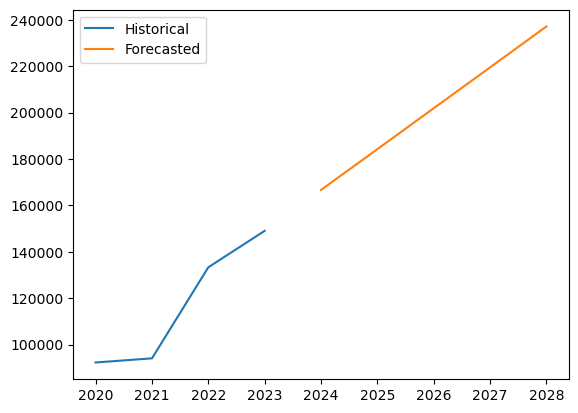

In [96]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
df1 = pd.read_csv('C:/Users/27728/OneDrive/Documents/archive/ds_salaries.csv')
salary_data = df1[['work_year', 'salary_in_usd']].groupby('work_year').mean()
salary_data.index = pd.to_datetime(salary_data.index, format='%Y')

model = ARIMA(salary_data, order=(1, 1, 1))
model_fit = model.fit() 

forecast = model_fit.forecast(steps=5)
print(forecast)
plt.plot(salary_data, label='Historical')
plt.plot(forecast, label='Forecasted')
plt.legend()
plt.show()
